# Tanzanian Water Wells Project

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

- Predict the condition of the water wells in Tanzania

### End Users:

- Governments, NGOs

### True business problem:

- Create a model that can, if given data of the water wells , predict if the water well needs repair. 

### Context:

- **False positive** in this context: Predicts that an water well doesn't need repair but it actually does.
    - **Outcome**: The people can't get water from the well.
    
- **False negative** in this context: Predicts that an water well needs repair but it actually doesn't.

    - **Outcome**: Waste money/human resources on checking the well.

### Evaluation 

Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- **Accuracy**
- **Precision**
- Recall
- F1-Score

We can focus on accuracy for ease of use, but should also be maximizing our Precision Score and minimizing False Positives, because false positives are more costly than false negatives.

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

### Training Set Values Exploration

In [2]:
# import pandas
import pandas as pd
# read training data values
X = pd.read_csv("../../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", index_col='id')

In [3]:
X

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

The data set is pretty large and there are not that many null values

### Drop duplicated columns

From our data exploration process, we discovered that many columns are duplicates of each other, so we are going to drop them from our analysis. For detailed data exploration steps, refer to jupyter notebook named "EDA.ipynb" in notebooks/Samantha.

In [ ]:
drop_columns = ["quantity_group", "source_type", "num_private", "waterpoint_type"]
X = X.drop(drop_columns, axis =1)

### y_train Exploration

In [5]:
y = pd.read_csv('../../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv', index_col='id')
y

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [6]:
# convert the dataframe into a series
y = y['status_group']

In [7]:
y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

### Visualization

Take a look at the location of the wells to see if there's any pattern.

In [65]:
import plotly.express as px

In [ ]:
fig = px.scatter_mapbox(df,
                       lat='lat',
                       lon='long',
                       color='')
fig.update_layout(mapbox_style='open-street-map')
fig.show()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

### Train Test Split

We are not getting the target for our testing data so we are going to treat our training data as if that's all the data we got. So we'll split it into training data, validation data and a holdout set that we will only look at in the end.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, test_size = .1)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

### Target Preprocessing

Our target has three unique values: functional, non functional and functional needs repair. It doesn't make much difference if the water well is non functional or functional needs repair because it requires attention regardless. The functional needs repair ones can break down at anytime and as a result, people who depend on the well to survive will suffer. For these reasons, we decide to simplify the problem into a binary prediction problem with 0 representing wells that needs repair and 1 representing wells that doesn't need repair (aka functional).

In [10]:
# set up a dictionary for mapping
map_dict = {"functional": 1, "non functional": 0, "functional needs repair": 0}

In [11]:
y_train = y_train.map(map_dict)

In [12]:
y_val = y_val.map(map_dict)

In [13]:
y_holdout = y_holdout.map(map_dict)

### Imputing Nulls and Encoding Categorical Values

In [14]:
# imports for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [15]:
# Seperate columns into three categories:
# numeric columns, OneHotEncoder approriate columns and frequency encoded appropriate columns
num_cols = []
ohe_cols = []
freq_cols = []

# we pick a maximum unique value of 3 for columns to be onehotencoded for simplicity reasons

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 3:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [16]:
# see what these columns are
print(f'these are the numeric columns: {num_cols}')
print('')
print(f'these are the OHE columns:{ohe_cols}')
print('')
print(f'these are the frequency encoded columns:{freq_cols}')

these are the numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']

these are the OHE columns:['public_meeting', 'recorded_by', 'permit']

these are the frequency encoded columns:['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [17]:
# check which columns have null values that needs imputing
list=[]
for c in range(len(X.isna().any())):
    if X.isna().any()[c] == True:
        list.append(X.isna().any().index[c])
list

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [18]:
# set up pipeline for preprocessing 
# for numeric columns, we need to scale it
# for unique value <3 columns, we need to one hot encode it
# for unique value >3 columns, we need to frequency encode it
ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value = 0)),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols),
        ('scaler', num_transformer, num_cols)
    ])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['public_meeting', 'recorded_by', 'permit']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer...
                                  'management_group', 'payment'

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

In [19]:
# imports for modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


In [34]:
# build an evaluation function 
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Precision Score:')
    print(f'Train - {precision_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {precision_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Recall Score: ')
    print(f'Train - {recall_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {recall_score(y_te, model.predict(X_te))}')
    print('  ')
    print('F1 Score: ')
    print(f'Train - {f1_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {f1_score(y_te, model.predict(X_te))}')
    print('  ')
    print('ROC_AUC: ')
    print(f'Train - {roc_auc_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {roc_auc_score(y_te, model.predict(X_te))}')
    print('  ')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te)

### Baseline Understanding

First, we want to see how the baseline model where we predict the majority class everytime does so we know what to compare our score to.

In [21]:
from sklearn.dummy import DummyClassifier

In [25]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.54508043, 0.54508043, 0.54508043, 0.54520514, 0.54520514])

Based on our dummy model assuming that all predictions will result in the majority class, we can see the dispersion of results - a little more than half of our waterwells are functioning.

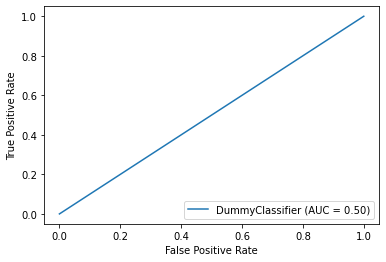

In [38]:
plot_roc_curve(dummy_model,X_train,y_train)

50% - not great results.

Accuracy Score:
Train - 0.5451303155006859
Test - 0.5390946502057613
  
Precision Score:
Train - 0.5451303155006859
Test - 0.5390946502057613
  
Recall Score: 
Train - 1.0
Test - 1.0
  
F1 Score: 
Train - 0.7056107954545455
Test - 0.7005347593582888
  
ROC_AUC: 
Train - 0.5
Test - 0.5
  
  
Confusion matrix for test data


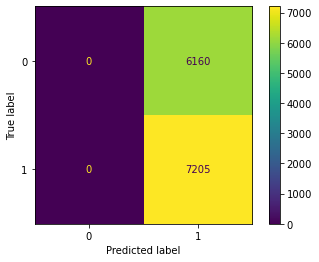

In [35]:
evaluate(dummy_model,X_train,y_train,X_val,y_val)

Since we combined our non-functional and functional needs repair targets, our target data is already pretty balanced. We will need to strengthen our model validation in order to determine what is a real prediction, and what is a result of random chance.

### Logistic Regression Modeling

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# we are using no penalty because 
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'fit_time': array([2.12409234, 2.16685081, 2.02137208, 2.01702499, 2.04306889]),
 'score_time': array([0.25671673, 0.25616717, 0.29136705, 0.23577595, 0.242908  ]),
 'test_score': array([0.68424991, 0.68587106, 0.68312757, 0.68275346, 0.68761691]),
 'train_score': array([0.68621399, 0.68440579, 0.68384462, 0.68406285, 0.68521636])}

The model can't find the minimum. Let's try another solver, saga, that can deal with large datasets.

In [39]:
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(solver='saga'))
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/an

{'fit_time': array([2.98374414, 2.82400107, 2.85567212, 2.83926702, 2.957129  ]),
 'score_time': array([0.22674584, 0.22364116, 0.26780915, 0.22865391, 0.23884606]),
 'test_score': array([0.67265245, 0.67140541, 0.664422  , 0.66529492, 0.67078189]),
 'train_score': array([0.67894999, 0.67533358, 0.67605063, 0.67891882, 0.67770296])}

In [40]:
log_classifier.fit(X_train,y_train)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

Accuracy Score:
Train - 0.6774909589724405
Test - 0.6676393565282455
  
Precision Score:
Train - 0.6852789770840252
Test - 0.6472971532146284
  
Recall Score: 
Train - 0.7552271583474401
Test - 0.8426092990978488
  
F1 Score: 
Train - 0.718554793775166
Test - 0.7321514712976364
  
ROC_AUC: 
Train - 0.6697782902165976
Test - 0.6527981560424309
  
  
Confusion matrix for test data


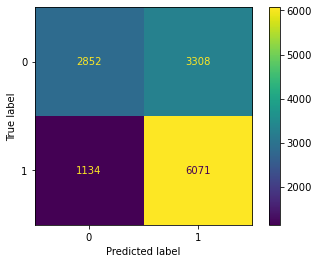

In [41]:
evaluate(log_classifier, X_train, y_train, X_val, y_val)

The model still didn't converge. Logistic regression is not very good at interaction terms which we'd expect in this dataset.

### KNN Modeling

In [42]:
# build a baseline Knn model
Knn_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [43]:
#Cross validate the X_train dataset
from sklearn.model_selection import cross_validate
cross_validate(Knn_classifier, X_train, y_train, return_train_score=True)

{'fit_time': array([2.06853867, 2.33069491, 2.29054594, 1.97387314, 2.29323292]),
 'score_time': array([4.09630227, 5.11160707, 4.79372692, 4.08288884, 4.91764688]),
 'test_score': array([0.75134057, 0.74373363, 0.74560419, 0.74759945, 0.75009353]),
 'train_score': array([0.83604564, 0.83822796, 0.83657563, 0.83520389, 0.83464272])}

Accuracy Score:
Train - 0.8406285072951739
Test - 0.7572764683875794
  
Precision Score:
Train - 0.8373391494002181
Test - 0.7597377049180328
  
Recall Score: 
Train - 0.8782541062359884
Test - 0.8040249826509368
  
F1 Score: 
Train - 0.8573087401187978
Test - 0.781254214430209
  
ROC_AUC: 
Train - 0.8368954487754128
Test - 0.7533111926241698
  
  
Confusion matrix for test data


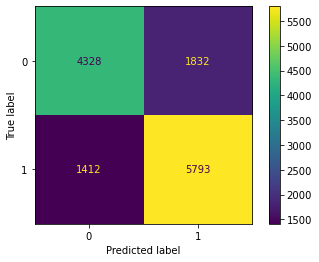

In [44]:
#Evaluate the function
Knn_classifier.fit(X_train,y_train)
evaluate(Knn_classifier, X_train, y_train, X_val, y_val)

KNN has good scores, way better than Logistic Regression, but as we add more data to the model, it's going to take more and more time to run. So we are not going to use KNN model. 

### Decision Tree Modeling

In [45]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
# set up pipeline for decision tree models
dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])

In [46]:
# baseline decision tree model
cross_validate(dt, X_train, y_train, return_train_score = True)

{'fit_time': array([2.14893293, 1.93697095, 2.03919721, 1.93542767, 1.89299703]),
 'score_time': array([0.2290051 , 0.28910184, 0.21938205, 0.21517015, 0.23236299]),
 'test_score': array([0.76717795, 0.76805088, 0.76530739, 0.76144158, 0.76169098]),
 'train_score': array([0.99947001, 0.99950118, 0.99956354, 0.99962589, 0.99950118])}

Accuracy Score:
Train - 0.9994762439206883
Test - 0.7598952487841377
  
Precision Score:
Train - 0.9998626499404817
Test - 0.7776542523624236
  
Recall Score: 
Train - 0.999176465205655
Test - 0.7766828591256072
  
F1 Score: 
Train - 0.9995194398041145
Test - 0.7771682522047081
  
ROC_AUC: 
Train - 0.9995059867425358
Test - 0.7584712996926738
  
  
Confusion matrix for test data


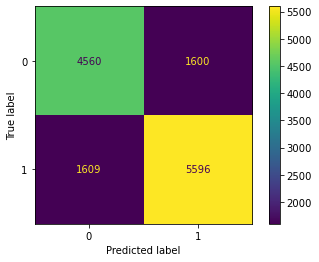

In [47]:
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_val, y_val)

- The score is way better on the training set than the test set so the model is definitely overfitted, which is expected for an untuned decision tree model. 

#### Improve Decision Tree by Gridsearching

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# correct for overfitting by limiting max depth and minimum samples split
dt_grid_params = {'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100]}

In [50]:
# Gridsearch for best precision score because that's what we want to maximize according to our business problem
dt_grid = GridSearchCV(dt, dt_grid_params, scoring = 'precision')
dt_output = dt_grid.fit(X_train, y_train)

In [51]:
# See the gridsearch result
dt_output.best_params_

{'classifier__max_depth': 10, 'classifier__min_samples_split': 2}

In [52]:
dt_best_model = dt_output.best_estimator_

Accuracy Score:
Train - 0.7987030801845617
Test - 0.7661054994388328
  
Precision Score:
Train - 0.786468290250187
Test - 0.757805587157123
  
Recall Score: 
Train - 0.8658095804547742
Test - 0.8320610687022901
  
F1 Score: 
Train - 0.8242339772207583
Test - 0.7931992590632442
  
ROC_AUC: 
Train - 0.7920450468344712
Test - 0.7605110538316646
  
  
Confusion matrix for test data


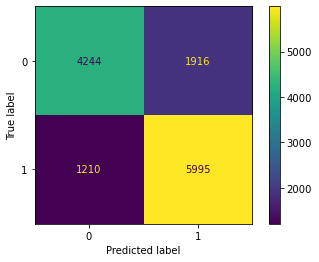

In [53]:
#Evaluate the model
evaluate(dt_best_model, X_train, y_train, X_val, y_val)

#### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# setting up pipeline for random forest models
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [56]:
# set up parameter grid
rfc_grid_params = {'classifier__n_estimators': [1,10,100], 'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100], 'classifier__max_features': ['sqrt','log2', None], 'classifier__max_samples': [0.1,0.3,0.5]}

In [57]:
# Gridsearch for best precision score 
rfc_grid = GridSearchCV(rfc, rfc_grid_params, scoring = 'precision')
rfc_output = rfc_grid.fit(X_train, y_train)

In [58]:
# See the gridsearch result
rfc_output.best_params_

{'classifier__max_depth': 10,
 'classifier__max_features': None,
 'classifier__max_samples': 0.5,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 100}

In [59]:
rfc_best_model = rfc_output.best_estimator_

Accuracy Score:
Train - 0.8275844868437461
Test - 0.7866816311260756
  
Precision Score:
Train - 0.7854959498700902
Test - 0.748006379585327
  
Recall Score: 
Train - 0.940568239008098
Test - 0.9113115891741846
  
F1 Score: 
Train - 0.8560661267151096
Test - 0.8216229744103111
  
ROC_AUC: 
Train - 0.816374699611517
Test - 0.7761103400416377
  
  
Confusion matrix for test data


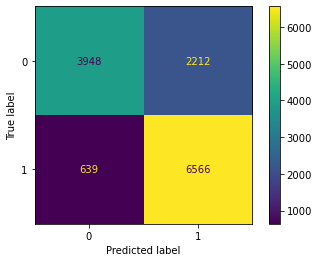

In [60]:
# Evaluate the model
evaluate(rfc_best_model, X_train, y_train, X_val, y_val)

#### Catboost

In [61]:
from catboost import CatBoostClassifier

In [62]:
cbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier())])

In [63]:
cbc.fit(X_train, y_train)

Learning rate set to 0.049826
0:	learn: 0.6746513	total: 74.1ms	remaining: 1m 14s
1:	learn: 0.6587996	total: 85.2ms	remaining: 42.5s
2:	learn: 0.6448416	total: 94.6ms	remaining: 31.4s
3:	learn: 0.6329566	total: 105ms	remaining: 26s
4:	learn: 0.6221820	total: 116ms	remaining: 23.1s
5:	learn: 0.6146704	total: 127ms	remaining: 21.1s
6:	learn: 0.6059508	total: 140ms	remaining: 19.9s
7:	learn: 0.5994655	total: 153ms	remaining: 18.9s
8:	learn: 0.5917500	total: 165ms	remaining: 18.1s
9:	learn: 0.5855488	total: 175ms	remaining: 17.3s
10:	learn: 0.5798882	total: 187ms	remaining: 16.8s
11:	learn: 0.5753365	total: 200ms	remaining: 16.4s
12:	learn: 0.5709314	total: 211ms	remaining: 16s
13:	learn: 0.5662230	total: 223ms	remaining: 15.7s
14:	learn: 0.5624279	total: 233ms	remaining: 15.3s
15:	learn: 0.5589481	total: 244ms	remaining: 15s
16:	learn: 0.5561165	total: 256ms	remaining: 14.8s
17:	learn: 0.5532814	total: 267ms	remaining: 14.6s
18:	learn: 0.5505475	total: 277ms	remaining: 14.3s
19:	learn: 0.

164:	learn: 0.4501990	total: 2.06s	remaining: 10.4s
165:	learn: 0.4498834	total: 2.07s	remaining: 10.4s
166:	learn: 0.4496368	total: 2.09s	remaining: 10.4s
167:	learn: 0.4492583	total: 2.1s	remaining: 10.4s
168:	learn: 0.4490669	total: 2.11s	remaining: 10.4s
169:	learn: 0.4488535	total: 2.12s	remaining: 10.4s
170:	learn: 0.4485864	total: 2.13s	remaining: 10.3s
171:	learn: 0.4483759	total: 2.15s	remaining: 10.3s
172:	learn: 0.4481754	total: 2.16s	remaining: 10.3s
173:	learn: 0.4479492	total: 2.17s	remaining: 10.3s
174:	learn: 0.4476422	total: 2.19s	remaining: 10.3s
175:	learn: 0.4471436	total: 2.2s	remaining: 10.3s
176:	learn: 0.4469636	total: 2.21s	remaining: 10.3s
177:	learn: 0.4467663	total: 2.22s	remaining: 10.3s
178:	learn: 0.4466329	total: 2.23s	remaining: 10.2s
179:	learn: 0.4465261	total: 2.24s	remaining: 10.2s
180:	learn: 0.4461663	total: 2.26s	remaining: 10.2s
181:	learn: 0.4458380	total: 2.27s	remaining: 10.2s
182:	learn: 0.4456233	total: 2.28s	remaining: 10.2s
183:	learn: 0.

326:	learn: 0.4157075	total: 4.13s	remaining: 8.5s
327:	learn: 0.4155501	total: 4.14s	remaining: 8.48s
328:	learn: 0.4153513	total: 4.15s	remaining: 8.47s
329:	learn: 0.4152353	total: 4.16s	remaining: 8.45s
330:	learn: 0.4150368	total: 4.17s	remaining: 8.44s
331:	learn: 0.4149460	total: 4.19s	remaining: 8.43s
332:	learn: 0.4148151	total: 4.2s	remaining: 8.41s
333:	learn: 0.4146398	total: 4.21s	remaining: 8.4s
334:	learn: 0.4144620	total: 4.22s	remaining: 8.39s
335:	learn: 0.4143041	total: 4.24s	remaining: 8.38s
336:	learn: 0.4141716	total: 4.25s	remaining: 8.36s
337:	learn: 0.4139423	total: 4.26s	remaining: 8.35s
338:	learn: 0.4136959	total: 4.27s	remaining: 8.33s
339:	learn: 0.4135489	total: 4.28s	remaining: 8.32s
340:	learn: 0.4133584	total: 4.3s	remaining: 8.3s
341:	learn: 0.4132789	total: 4.31s	remaining: 8.29s
342:	learn: 0.4130985	total: 4.32s	remaining: 8.28s
343:	learn: 0.4129478	total: 4.33s	remaining: 8.26s
344:	learn: 0.4128026	total: 4.34s	remaining: 8.25s
345:	learn: 0.412

486:	learn: 0.3944211	total: 5.96s	remaining: 6.28s
487:	learn: 0.3942983	total: 5.97s	remaining: 6.27s
488:	learn: 0.3941615	total: 5.99s	remaining: 6.25s
489:	learn: 0.3941007	total: 6s	remaining: 6.24s
490:	learn: 0.3939660	total: 6.01s	remaining: 6.23s
491:	learn: 0.3937942	total: 6.02s	remaining: 6.21s
492:	learn: 0.3936585	total: 6.03s	remaining: 6.2s
493:	learn: 0.3935973	total: 6.04s	remaining: 6.19s
494:	learn: 0.3934967	total: 6.05s	remaining: 6.17s
495:	learn: 0.3934025	total: 6.06s	remaining: 6.16s
496:	learn: 0.3932283	total: 6.08s	remaining: 6.15s
497:	learn: 0.3931600	total: 6.09s	remaining: 6.14s
498:	learn: 0.3930688	total: 6.1s	remaining: 6.13s
499:	learn: 0.3929156	total: 6.11s	remaining: 6.11s
500:	learn: 0.3928178	total: 6.12s	remaining: 6.1s
501:	learn: 0.3927486	total: 6.13s	remaining: 6.08s
502:	learn: 0.3925755	total: 6.15s	remaining: 6.07s
503:	learn: 0.3925719	total: 6.16s	remaining: 6.06s
504:	learn: 0.3924774	total: 6.17s	remaining: 6.04s
505:	learn: 0.3923

662:	learn: 0.3769924	total: 8.02s	remaining: 4.07s
663:	learn: 0.3768845	total: 8.03s	remaining: 4.06s
664:	learn: 0.3768321	total: 8.04s	remaining: 4.05s
665:	learn: 0.3767178	total: 8.05s	remaining: 4.04s
666:	learn: 0.3766383	total: 8.06s	remaining: 4.03s
667:	learn: 0.3765341	total: 8.07s	remaining: 4.01s
668:	learn: 0.3764000	total: 8.09s	remaining: 4s
669:	learn: 0.3763219	total: 8.1s	remaining: 3.99s
670:	learn: 0.3762151	total: 8.11s	remaining: 3.98s
671:	learn: 0.3761431	total: 8.12s	remaining: 3.96s
672:	learn: 0.3760021	total: 8.13s	remaining: 3.95s
673:	learn: 0.3759398	total: 8.14s	remaining: 3.94s
674:	learn: 0.3758760	total: 8.15s	remaining: 3.92s
675:	learn: 0.3757863	total: 8.16s	remaining: 3.91s
676:	learn: 0.3757317	total: 8.18s	remaining: 3.9s
677:	learn: 0.3756328	total: 8.19s	remaining: 3.89s
678:	learn: 0.3755601	total: 8.2s	remaining: 3.88s
679:	learn: 0.3755003	total: 8.21s	remaining: 3.86s
680:	learn: 0.3754164	total: 8.22s	remaining: 3.85s
681:	learn: 0.3753

834:	learn: 0.3627750	total: 10.1s	remaining: 1.99s
835:	learn: 0.3626746	total: 10.1s	remaining: 1.97s
836:	learn: 0.3626002	total: 10.1s	remaining: 1.96s
837:	learn: 0.3625199	total: 10.1s	remaining: 1.95s
838:	learn: 0.3624372	total: 10.1s	remaining: 1.94s
839:	learn: 0.3623851	total: 10.1s	remaining: 1.93s
840:	learn: 0.3623197	total: 10.1s	remaining: 1.91s
841:	learn: 0.3622504	total: 10.1s	remaining: 1.9s
842:	learn: 0.3622496	total: 10.1s	remaining: 1.89s
843:	learn: 0.3621408	total: 10.2s	remaining: 1.88s
844:	learn: 0.3620997	total: 10.2s	remaining: 1.86s
845:	learn: 0.3620371	total: 10.2s	remaining: 1.85s
846:	learn: 0.3619588	total: 10.2s	remaining: 1.84s
847:	learn: 0.3618819	total: 10.2s	remaining: 1.83s
848:	learn: 0.3617936	total: 10.2s	remaining: 1.82s
849:	learn: 0.3617025	total: 10.2s	remaining: 1.8s
850:	learn: 0.3615911	total: 10.2s	remaining: 1.79s
851:	learn: 0.3615239	total: 10.2s	remaining: 1.78s
852:	learn: 0.3614216	total: 10.3s	remaining: 1.77s
853:	learn: 0.

992:	learn: 0.3514205	total: 11.9s	remaining: 83.8ms
993:	learn: 0.3513442	total: 11.9s	remaining: 71.9ms
994:	learn: 0.3512612	total: 11.9s	remaining: 59.9ms
995:	learn: 0.3511764	total: 11.9s	remaining: 47.9ms
996:	learn: 0.3510887	total: 11.9s	remaining: 36ms
997:	learn: 0.3510154	total: 12s	remaining: 24ms
998:	learn: 0.3509649	total: 12s	remaining: 12ms
999:	learn: 0.3508773	total: 12s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

Accuracy Score:
Train - 0.8488589599700711
Test - 0.8070332959221848
  
Precision Score:
Train - 0.8252687065024914
Test - 0.7845018450184502
  
Recall Score: 
Train - 0.916868737704168
Test - 0.8852185981956975
  
F1 Score: 
Train - 0.8686605981794537
Test - 0.8318226279752201
  
ROC_AUC: 
Train - 0.8421113071128582
Test - 0.8004015068900564
  
  
Confusion matrix for test data


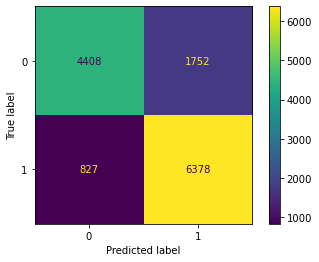

In [64]:
evaluate(cbc, X_train, y_train, X_val, y_val)

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [33]:
# code here to show your final model

In [34]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
